In [64]:
from tracker_seg import SegmentationTracker
from benchmark import video_benchmark, load_labels
import numpy as np

tracker = SegmentationTracker(
    fit_per_call=2,
    n_estimators=30,
    n_jobs=12,
    max_depth=15,
    max_samples=0.1,
    sigma_min=0.5,
    sigma_max=3.5,
    intensity=True,
    edges=True,
    texture=True,
    preprocess_gamma=0.5,
    dataset_size=5,
    margin=30,
    as_circle_mask=False,
    fit_stride=4
)


data = [
    ["videos/bee.mp4", "zipped/bee/30/bee.txt", (1, 40)],
    ["videos/car.mp4", "zipped/car/30/car.txt", (1, 200)],
    ["videos/helicopter.mp4", "zipped/helicopter/30/helicopter.txt", (1, 200)],
    ["videos/billiard_2.mp4", "zipped/billiard_2/30/billiard_2.txt", (1, 500)],
    ["videos/billiard_3.mp4", "zipped/billiard_3/30/billiard_3.txt", (1, 500)],
    ["videos/basketball_1.mp4", "zipped/basketball_1/30/basketball_1.txt", (1, 280)],
    ["videos/basketball_2.mp4", "zipped/basketball_2/30/basketball_2.txt", (1, 100)],
    ["videos/basketball_3.mp4", "zipped/basketball_3/30/basketball_3.txt", (1, 400)],
    ["videos/pingpong_7.mp4", "zipped/pingpong_7/30/pingpong_7.txt", (1, 200)],
    ["videos/Bolt.mp4", "zipped/Bolt/groundtruth_rect.txt", (1, 300)],
    ["videos/jellyfish_5.mp4", "zipped/jellyfish_5/30/jellyfish_5.txt", (1, 400)],
]

In [65]:
import pytictoc
import time

ious = {}

for margin in [30, 40, 50]:
    ious[margin] = []
    tracker.margin = margin
    for args in data:
        tracker.reset()
        start = time.time()
        sr = video_benchmark(*args[:2], tracker, frames=args[2], show=0, show_bar=False)
        end = time.time() - start

        iou, iou05, iou025 = sr[0], sr[1], sr[2]
        print(args[0], iou, iou05, iou025, np.mean(sr[-1] == 0.0), args[2][1] / end)
        ious[margin].append(sr[-1])
    print('***')

videos/bee.mp4 0.16997682199181127 0.20512820512820512 0.23076923076923078 0.6410256410256411 3.7806247336025653
videos/car.mp4 0.8215471813047701 1.0 1.0 0.0 6.097236207872745
videos/helicopter.mp4 0.6930984681029319 0.9246231155778895 1.0 0.0 8.114996764007131
videos/billiard_2.mp4 0.756813899389779 0.9819639278557114 0.9879759519038076 0.0 6.628801285498502
videos/billiard_3.mp4 0.8042796484573391 0.969939879759519 0.9939879759519038 0.0 6.65407275569507
videos/basketball_1.mp4 0.4175958886427447 0.5304659498207885 0.5663082437275986 0.4229390681003584 7.770410872842928
videos/basketball_2.mp4 0.7645415683229116 0.9696969696969697 1.0 0.0 8.496778275057403
videos/basketball_3.mp4 0.7301717104389063 0.9223057644110275 0.9924812030075187 0.0 8.263832272559146
videos/pingpong_7.mp4 0.15171002203753498 0.17587939698492464 0.22110552763819097 0.7185929648241206 7.320844076825695
videos/Bolt.mp4 0.5363531117437007 0.5183946488294314 0.8929765886287625 0.0 7.033091292058221
videos/jellyfis

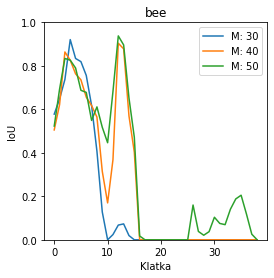

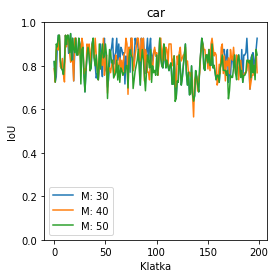

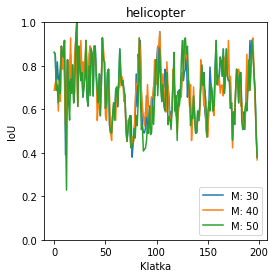

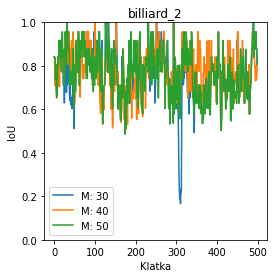

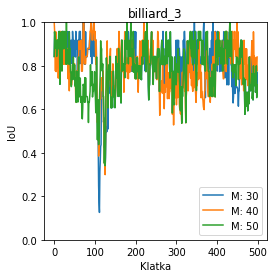

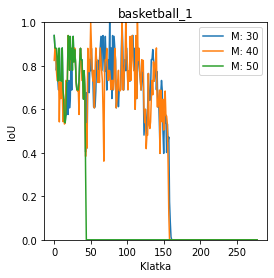

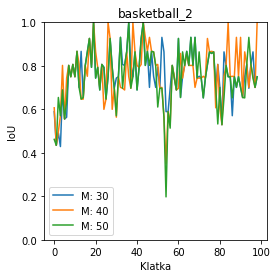

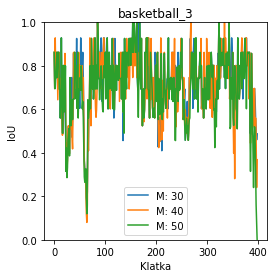

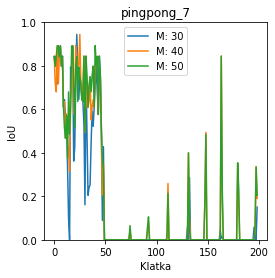

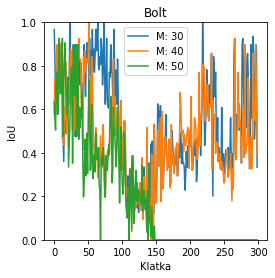

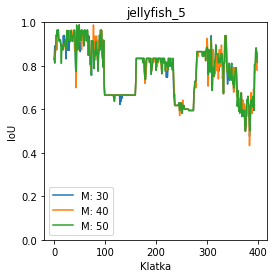

In [69]:
from matplotlib import pyplot as plt

names = ['bee',
'car',
'helicopter',
'billiard_2',
'billiard_3',
'basketball_1',
'basketball_2',
'basketball_3',
'pingpong_7',
'Bolt',
'jellyfish_5',
]

for i in range(11):
    plt.figure(figsize=(4, 4))
    plt.title(names[i])
    plt.ylabel('IoU')
    plt.xlabel('Klatka')
    plt.ylim((0, 1))
    plt.plot(ious[30][i])
    plt.plot(ious[40][i])
    plt.plot(ious[50][i])
    plt.legend(['M: 30', 'M: 40', 'M: 50'])
    plt.savefig(f'art_data/fig_{i}.png')
    plt.show()



